<a href="https://colab.research.google.com/github/A-Rodano/A-Rodano/blob/main/New_PMT_Equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


In [2]:
def panda_from_gspreadsheet(key, sheet_name='Sheet1', header=0):
  # google spredsheet TO panda dataframe 
  # remember to abilitate the public sharing of the data
  url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
      key=key, sheet_name=sheet_name.replace(' ', '%20'))
  return pd.read_csv(url, header=header)


In [3]:
BA1650 = panda_from_gspreadsheet(key='186jaMIan9JliWwkcuxou4lpA5mbm8vMqjYsFi3qJehU', sheet_name='BA1650', header=0)
BA1646 = panda_from_gspreadsheet(key='186jaMIan9JliWwkcuxou4lpA5mbm8vMqjYsFi3qJehU', sheet_name='BA1646', header=0)
BA1648 = panda_from_gspreadsheet(key='186jaMIan9JliWwkcuxou4lpA5mbm8vMqjYsFi3qJehU', sheet_name='BA1648', header=0)
BA1649 = panda_from_gspreadsheet(key='186jaMIan9JliWwkcuxou4lpA5mbm8vMqjYsFi3qJehU', sheet_name='BA1649', header=0)

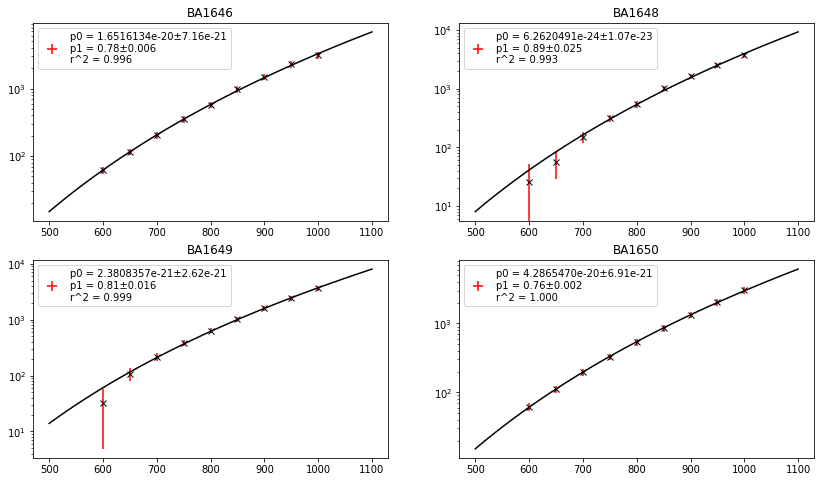

In [4]:
def pmt_actual_gain(v, p0, p1):
  return p0*v**(p1*10)

###      Gain = A*V**(kn)
#  A constant 
#  V : the applied voltage (across PMT)
#  K : a constant determined by the electrode structure and materal
#  n : the number of dynode stages


par1, cov1 = curve_fit(pmt_actual_gain, BA1646.Voltage.values[:], BA1646.Mean_pWb.values[:], p0=[0,0.8], sigma=BA1646.Sdev_pWb.values[:] )
par2, cov2 = curve_fit(pmt_actual_gain, BA1648.Voltage.values[:], BA1648.Mean_pWb.values[:], p0=[0,0.8], sigma=BA1648.Sdev_pWb.values[:] )
par3, cov3 = curve_fit(pmt_actual_gain, BA1649.Voltage.values[:], BA1649.Mean_pWb.values[:], p0=[0,0.8], sigma=BA1649.Sdev_pWb.values[:] )
par4, cov4 = curve_fit(pmt_actual_gain, BA1650.Voltage.values[:], BA1650.Mean_pWb.values[:], p0=[0,0.8], sigma=BA1650.Sdev_pWb.values[:] )

err1  = np.sqrt(np.diag(cov1))
err2  = np.sqrt(np.diag(cov2))
err3  = np.sqrt(np.diag(cov3))
err4  = np.sqrt(np.diag(cov4))

# fit between this two numbers
x= np.linspace(500, 1100, num=100)

fig, ax = plt.subplots(2,2, figsize=(14,8))

ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

ax[0,0].plot (x, pmt_actual_gain(x ,*par1), 'k-')
ax[0,1].plot (x, pmt_actual_gain(x ,*par2), 'k-')
ax[1,0].plot (x, pmt_actual_gain(x ,*par3), 'k-')
ax[1,1].plot (x, pmt_actual_gain(x ,*par4), 'k-')

ax[0,0].plot (BA1646.Voltage.values, BA1646.Mean_pWb.values, 'kx')
ax[0,1].plot (BA1648.Voltage.values, BA1648.Mean_pWb.values, 'kx')
ax[1,0].plot (BA1649.Voltage.values, BA1649.Mean_pWb.values, 'kx')
ax[1,1].plot (BA1650.Voltage.values, BA1650.Mean_pWb.values, 'kx')

r21=r2_score(BA1646.Mean_pWb.values, pmt_actual_gain(BA1646.Voltage.values, *par1))
r22=r2_score(BA1648.Mean_pWb.values, pmt_actual_gain(BA1648.Voltage.values, *par2))
r23=r2_score(BA1649.Mean_pWb.values, pmt_actual_gain(BA1649.Voltage.values, *par3))
r24=r2_score(BA1650.Mean_pWb.values, pmt_actual_gain(BA1650.Voltage.values, *par4))

### error bars 
ax[0,0].errorbar(BA1646.Voltage.values, BA1646.Mean_pWb.values, xerr=0, yerr=BA1646.Sdev_pWb.values, fmt='none', color='red', 
                 label='p0 = {0:.7e}±{1:.2e}\np1 = {2:.2f}±{3:.3f} \nr^2 = {4:.3f}'.format(par1[0], err1[0], par1[1], err1[1], r21))
ax[0,1].errorbar(BA1648.Voltage.values, BA1648.Mean_pWb.values, xerr=0, yerr=BA1648.Sdev_pWb.values, fmt='none', color='red',
                 label='p0 = {0:.7e}±{1:.2e}\np1 = {2:.2f}±{3:.3f} \nr^2 = {4:.3f}'.format(par2[0], err2[0], par2[1], err2[1], r22))
ax[1,0].errorbar(BA1649.Voltage.values, BA1649.Mean_pWb.values, xerr=0, yerr=BA1649.Sdev_pWb.values, fmt='none', color='red',
                 label='p0 = {0:.7e}±{1:.2e}\np1 = {2:.2f}±{3:.3f} \nr^2 = {4:.3f}'.format(par3[0], err3[0], par3[1], err3[1], r23))
ax[1,1].errorbar(BA1650.Voltage.values, BA1650.Mean_pWb.values, xerr=0, yerr=BA1650.Sdev_pWb.values, fmt='none', color='red', 
                 label='p0 = {0:.7e}±{1:.2e}\np1 = {2:.2f}±{3:.3f} \nr^2 = {4:.3f}'.format(par4[0], err4[0], par4[1], err4[1], r24))
#                  must be    0       1             2       3               4

# add titles
ax[0,0].set_title('BA1646')
ax[0,1].set_title('BA1648')
ax[1,0].set_title('BA1649')
ax[1,1].set_title('BA1650')

ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()

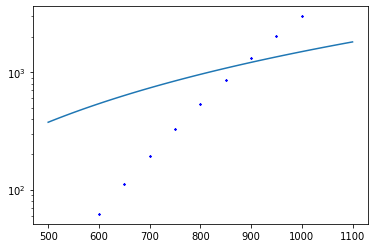

In [5]:
x = np.linspace(500,1100,100)
plt.yscale('log')
plt.plot(x,pmt_actual_gain(x,0.0015,0.2))
plt.plot (BA1650.Voltage.values, BA1650.Mean_pWb.values, 'b*', markersize= 2)

In [6]:
def equalizzatore(x, p1, p2, p3, p4):
    d = np.zeros(len(x))
    for i in range(len(x)):
      m = np.min( np.array( (pmt_actual_gain(x[i],*p1), pmt_actual_gain(x[i],*p2), pmt_actual_gain(x[i],*p3),pmt_actual_gain(x[i],*p4)) ) )
      M = np.max( np.array( (pmt_actual_gain(x[i],*p1),pmt_actual_gain(x[i],*p2),pmt_actual_gain(x[i],*p3),pmt_actual_gain(x[i],*p4)) ) )
      d[i] = (M+m)/(2)
    supreme_minimum = np.min(d)
    print(d)
    return x[np.where(d==supreme_minimum)]

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


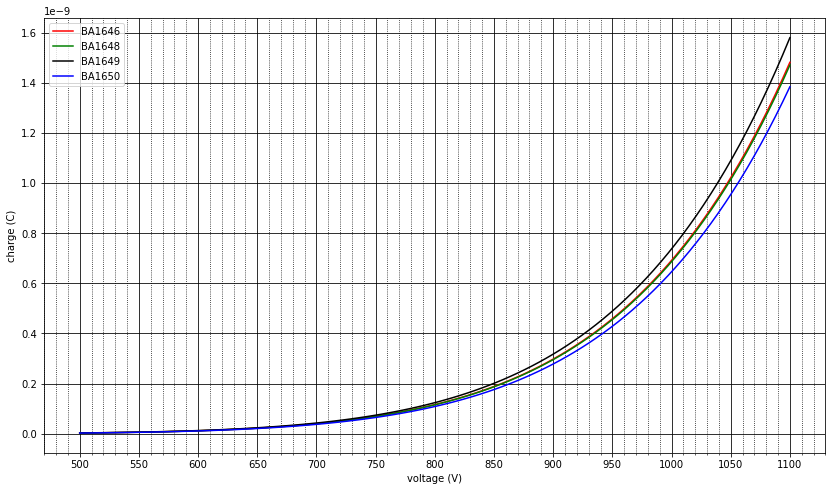

In [7]:
par1, cov1 = curve_fit(pmt_actual_gain, BA1646.Voltage.values[:], BA1646.charge.values[:]*10e-12, p0=[0,0.8], sigma=BA1646.Sdev_pWb.values[:] )
par2, cov2 = curve_fit(pmt_actual_gain, BA1648.Voltage.values[:], BA1648.charge.values[:]*10e-12, p0=[0,0.8], sigma=BA1648.Sdev_pWb.values[:] )
par3, cov3 = curve_fit(pmt_actual_gain, BA1649.Voltage.values[:], BA1649.charge.values[:]*10e-12, p0=[0,0.8], sigma=BA1649.Sdev_pWb.values[:] )
par4, cov4 = curve_fit(pmt_actual_gain, BA1650.Voltage.values[:], BA1650.charge.values[:]*10e-12, p0=[0,0.8], sigma=BA1650.Sdev_pWb.values[:] )

# fit between this two numbers
x = np.linspace(500, 1100, num=100)

fig, ax = plt.subplots( figsize=(14,8))

# plt.yscale('log')

plt.plot (x, pmt_actual_gain(x ,*par1), 'r-', label="BA1646")
plt.plot (x, pmt_actual_gain(x ,*par2), 'g-', label="BA1648")
plt.plot (x, pmt_actual_gain(x ,*par3), 'k-', label="BA1649")
plt.plot (x, pmt_actual_gain(x ,*par4), 'b-', label="BA1650")
plt.xlabel("voltage (V)")
plt.ylabel("charge (C)")

plt.legend()

          # major ticks
ax.xaxis.set_major_locator(MultipleLocator(50))
#ax.yaxis.set_major_locator(MultipleLocator(50))
          # minor ticks
ax.xaxis.set_minor_locator(MultipleLocator(10))
#ax.yaxis.set_minor_locator(MultipleLocator(50))
          # change style of ticks
ax.grid(which='major', color='k', linestyle='-')
ax.grid(which='minor', color='k', linestyle=':')



In [8]:
y = np.linspace(500, 1100, num=1000)
for i in range(len(y)):
  val = []
  if pmt_actual_gain(y,*par1)-25 < 0.001:
    val.append(pmt_actual_gain)
h = np.where( (pmt_actual_gain(y, *par1)-25) < 0.00001)
print(h)

ValueError: ignored

In [9]:
print(f'1646: {(12*10e-12/par1[0])**(1/(10*par1[1]))}')
print(f'1648: {(12*10e-12/par2[0])**(1/(10*par2[1]))}')
print(f'1649: {(12*10e-12/par3[0])**(1/(10*par3[1]))}')
print(f'1650: {(12*10e-12/par4[0])**(1/(10*par4[1]))}')

1646: 803.3867691900606
1648: 804.1395235601798
1649: 796.9626930693394
1650: 810.2534490480366


241 manual hamamatsu photonics

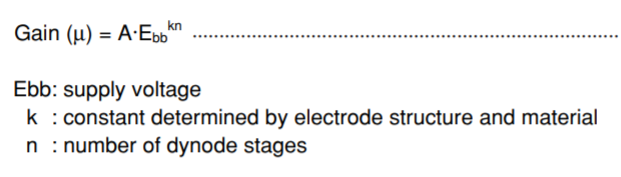